# Robotator Data Analysis


useful links:

https://matplotlib.org/tutorials/

http://pandas.pydata.org/pandas-docs/stable/

http://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.core.groupby.DataFrameGroupBy.hist.html


Read libraries:

In [2]:
#df_robotator = pd.read_csv('BFI.csv', sep=',')
#df_tablet = pd.read_csv('tablet.csv', sep=',')
#df_summary = pd.DataFrame ()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cbook as cbook
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

### NARs Summary Analysis:

Sub-scale 1: Negative Attitudes toward Situations and Interactions with Robots. Items - 4,7,8,9,10,12

Sub-scale 2: Negative Attitudes toward Social Influence of Robots. Items - 1,2,11,13,14

Sub-scale 3: Negative Attitudes toward Emotions in Interaction with Robots. Items - 3r,5r,6r

Syrdal, D. S., Dautenhahn, K., Koay, K. L., & Walters, M. L. (2009). The negative attitudes towards robots scale and reactions to robot behaviour in a live human-robot interaction study. Adaptive and Emergent Behaviour and Complex Systems.

r=reversed

In [2]:
def calculate_factors_NARS(data_frame_NARS):
#data_frame_NARS: a data frame of 14 columns 

    NARS_facrots = pd.DataFrame()
    NARS_facrots["NARS_sub1"] = data_frame_NARS[[3,6,7,8,9,11]].mean(axis=1)
    NARS_facrots["NARS_sub2"] = data_frame_NARS[[0,1,10,12,13]].mean(axis=1)
    NARS_facrots["NARS_sub3"] = 6 - data_frame_NARS[[2,4,5]].mean(axis=1)
    
    return NARS_facrots

##Godspeed Summary Analysis
The Godspeed questionnaires defined by Bartneck, Kulic, and Croft (2009)
were used to assess the children’s impressions of the robot, going beyond the
ones already covered in the ALMERE questionnaire. 

Anthropomorphism: Items 1,2,3,4,5

Animacy: Items 6,7,8,9,10,11

Likeability: Items 12,13,14,15,16

Perceived Intelligence: 17,18,19,20,21

Perceived Safety: 22,23,24

Bartneck, C., Kulić, D., Croft, E., & Zoghbi, S. (2009). Measurement instruments for the anthropomorphism, animacy, likeability, perceived intelligence, and perceived safety of robots. International journal of social robotics, 1(1), 71-81.

In [3]:
def calculate_factors_Godspeed(data_frame_Godspeed):
#data_frame_NARS: a data frame of 24 columns 

    df_Godspeed_facrots = pd.DataFrame()
    df_Godspeed_facrots["Godspeed_Anthropomorphism"] = data_frame_Godspeed[[0,1,2,3,4]].mean(axis=1)
    df_Godspeed_facrots["Godspeed_Animacy"] = data_frame_Godspeed[[5,6,7,8,9,10]].mean(axis=1)
    df_Godspeed_facrots["Godspeed_Likeability"] =  data_frame_Godspeed[[11,12,13,14,15]].mean(axis=1)
    df_Godspeed_facrots["Godspeed_Intelligence"] = data_frame_Godspeed[[16,17,18,19,20]].mean(axis=1)
    df_Godspeed_facrots["Godspeed_Safety"] = data_frame_Godspeed[[21,22,23]].mean(axis=1)
    
    return df_Godspeed_facrots

##SIMS Summary Analysis

F. Guay, R. J. Vallerand, and C. Blanchard, "On the assessment of
situational intrinsic and extrinsic motivation: The situational motivation
scale (SIMS)," Motivation and Emotion, vol. 24, pp. 175-
21, 2000. http://dx.doi.org/10.1023/A:1005614228250

In [124]:
#1	כי אני חושב/ת שהפעילות הזו מעניינת
#2	כי אני עושה את זה לטובתי שלי
#3	כי אני אמור/ה לעשות אותה
#4	עשויות להיות סיבות טובות לביצוע פעילות זו, אך אישית איני יודע/ת מהן
#5	כי אני חושב/ת שפעילות זו נעימה
#6	כי אני חושב/ת שפעילות זו טובה לי
#7	כי זה משהו שאני חייב לעשות
#8	אני מבצע/ת פעילות זו אך אינו בטוח אם זה שווה את זה
#9	כי הפעילות הזו כיפית
#10	בהחלטה אישית
#11	כי אין לי ברירה
#12	אני לא יודע/ת; אני לא רואה מה הפעילות הזו נותנת לי
#13	כי אני מרגיש/ה טוב כשאני מבצע/ת את הפעילות הזו
#14	כי אני מאמין/ה שפעילות זו חשובה לי
#15	כי אני מרגיש/ה שעלי לעשות זאת
#16	אני מבצע/ת פעילות זו אך איני בטוח כי זה דבר טוב

<B>Intrinsic motivation</B><br>
    1 - Because I think that this activity is interesting 0.91<br> 
    5 - Because I think that this activity is pleasant 0.90<br>
    9 - Because this activity is fun 0.89<br>
    13 - Because I feel good when doing this activity 0.83<br>
<B>Identified regulation</B><br>
    2 - Because I am doing it for my own good 0.77<br>
    6 - Because I think that this activity is good for me 0.31 0.60<br>
    10 - By personal decision 0.57<br>
    14 - Because I believe that this activity is important for me 0.52<br>
<B>External regulation</B><br>
    3 - Because I am supposed to do it 0.85<br>
    7 - Because it is something that I have to do 0.75<br>
    11 - Because I don’t have any choice 0.69<br>
    15 - Because I feel that I have to do it 0.58<br>
<B>Amotivation</B><br>
    4 - There may be good reasons to do this activity, but personally I don’t see any 0.83<br>
    8 - I do this activity but I am not sure if it is worth it 0.74<br>
    12 - I don’t know; I don’t see what this activity brings me 0.55 <br>
    16 - I do this activity, but I am not sure it is a good thing to pursue it 0.54<br>


In [2]:
def calculate_factors_SIMS(data_frame_SIMS):
#data_frame_NARS: a data frame of 24 columns 

    df_SIMS_facrots = pd.DataFrame()
    df_SIMS_facrots["IntrinsicMotivation"] = data_frame_SIMS[['SIMS_1','SIMS_5','SIMS_9','SIMS_13']].mean(axis=1)
    df_SIMS_facrots["IdentifiedRegulation"] = data_frame_SIMS[['SIMS_2','SIMS_6','SIMS_10','SIMS_14']].mean(axis=1)
    df_SIMS_facrots["ExternalRegulation"] =  data_frame_SIMS[['SIMS_3','SIMS_7','SIMS_11','SIMS_15']].mean(axis=1)
    df_SIMS_facrots["Amotivation"] = data_frame_SIMS[['SIMS_4','SIMS_8','SIMS_12','SIMS_16']].mean(axis=1)
    
    return df_SIMS_facrots

##Useful functions

In [1]:
def correlation_matrix(df):
    %matplotlib inline
    corr = df.corr()
    #print(corr)
    plt.figure(figsize=(6,6))
    cax = plt.matshow(corr,fignum=1)
    headers = list(df)
    x_pos = np.arange(len(headers))
    plt.xticks(x_pos, headers, rotation='vertical', fontsize=10)
    y_pos = np.arange(len(headers))
    plt.yticks(y_pos, headers, fontsize=10)
    plt.colorbar(cax)
    plt.show()

In [103]:
def plot_histogram (x, bins=[1,2,3,4,5,6]):
    # x is a series taken from a dataframe
    # n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=1)
    #x = x [~np.isnan(x)] #remove all NaN
    #x1 = np.asarray(x)
    x = x.dropna()
    title = x.name
    #plt.xlabel(title)  #(x.name)
    plt.ylabel('frequency')
    plt.rc('axes', titlesize=20)     # fontsize of the axes title
    plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
    plt.rc('legend', fontsize=20)    # legend fontsize
    plt.title(title)#(x.name + " histogram")
    plt.xticks(range(1, 6))   
    plt.grid(True)
    n, bins, patches = plt.hist(x.values, bins, facecolor='blue', alpha=1)

    #plt.axis([40, 160, 0, 0.03])

    #plt.show()

In [116]:
def plot_multi_histogram(x,xlabel,legend=['tablet', 'robot','teacher'],bins=[1,2,3,4,5,6]):
# x is a list of three series. Their Nan values should be removed
    ta = df_Attitudes_tablet["A_ta_"+str(i+1)].dropna()
    ro = df_Attitudes_robot["A_ro_"+str(i+1)].dropna()
    te = df_Attitudes_teacher["A_te_"+str(i+1)].dropna()
    plt.rc('axes', titlesize=20)     # fontsize of the axes title
    plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
    plt.rc('legend', fontsize=20)    # legend fontsize
    plt.title(xlabel)
    plt.ylabel("frequency")
    plt.xticks(range(1, 6))
    plt.hist(x,bins=bins, color=['red', 'green','blue'])
    plt.legend(legend,loc=2)
    #plt.xlabel(xlabel)

In [ ]:
def plot_

# ROBOTATOR Dyslexia May 2018

## Read data

In [202]:
df_Condition_Dyslexia = pd.read_csv('Results_RobotatorDyslexia_5_2018_RRK3_Condition.csv', sep=',')
df_SIMS_Dyslexia = pd.read_csv('Results_RobotatorDyslexia_5_2018_RRK3_SIMS.csv', sep=',')
df_AGr_Dyslexia = pd.read_csv('Results_RobotatorDyslexia_5_2018_RRK3_AGr.csv', sep=',')[range(7,17)]
df_ATa_Dyslexia = pd.read_csv('Results_RobotatorDyslexia_5_2018_RRK3_ATa.csv', sep=',')[range(7,22)]
df_ATe_Dyslexia = pd.read_csv('Results_RobotatorDyslexia_5_2018_RRK3_ATe.csv', sep=',')[range(7,22)]
df_ARo_Dyslexia = pd.read_csv('Results_RobotatorDyslexia_5_2018_RRK3_ARo.csv', sep=',')[range(7,22)]
df_NARsPre_Dyslexia = pd.read_csv('Results_RobotatorDyslexia_5_2018_RRK3_NARsPre.csv', sep=',')
df_NARsPost_Dyslexia = pd.read_csv('Results_RobotatorDyslexia_5_2018_RRK3_NARsPost.csv', sep=',')

##SIMS

F. Guay, R. J. Vallerand, and C. Blanchard, "On the assessment of
situational intrinsic and extrinsic motivation: The situational motivation
scale (SIMS)," Motivation and Emotion, vol. 24, pp. 175-
21, 2000. http://dx.doi.org/10.1023/A:1005614228250

In [124]:
#1	כי אני חושב/ת שהפעילות הזו מעניינת
#2	כי אני עושה את זה לטובתי שלי
#3	כי אני אמור/ה לעשות אותה
#4	עשויות להיות סיבות טובות לביצוע פעילות זו, אך אישית איני יודע/ת מהן
#5	כי אני חושב/ת שפעילות זו נעימה
#6	כי אני חושב/ת שפעילות זו טובה לי
#7	כי זה משהו שאני חייב לעשות
#8	אני מבצע/ת פעילות זו אך אינו בטוח אם זה שווה את זה
#9	כי הפעילות הזו כיפית
#10	בהחלטה אישית
#11	כי אין לי ברירה
#12	אני לא יודע/ת; אני לא רואה מה הפעילות הזו נותנת לי
#13	כי אני מרגיש/ה טוב כשאני מבצע/ת את הפעילות הזו
#14	כי אני מאמין/ה שפעילות זו חשובה לי
#15	כי אני מרגיש/ה שעלי לעשות זאת
#16	אני מבצע/ת פעילות זו אך איני בטוח כי זה דבר טוב

In [161]:
df_SIMS_factors  = calculate_factors_SIMS(df_SIMS_Dyslexia)
df_SIMS_factors.describe()

,IntrinsicMotivation,IdentifiedRegulation,ExternalRegulation,Amotivation
count,33.000000,33.000000,33.000000,33.000000
mean,5.106061,4.931818,4.386364,2.219697
std,1.306579,1.390920,1.379384,1.178846
min,2.250000,1.750000,1.250000,1.000000
25%,4.250000,4.000000,3.500000,1.250000
50%,5.000000,5.000000,4.500000,2.000000
75%,6.250000,6.000000,5.250000,3.000000
max,7.000000,7.000000,7.000000,5.250000


##Negative Attitudes Towards Robots (NARS)

In [180]:
NARS_pre_titles = []
NARS_post_titles = []
for i in range(1,15):
    NARS_pre_titles.append('NARS_pre_'+str(i))
    NARS_post_titles.append('NARS_post_'+str(i))
df_NARS_pre = df_NARsPre_Dyslexia[NARS_pre_titles]
df_NARS_factors_pre_Dyslexia = calculate_factors_NARS(df_NARS_pre)
df_NARS_post = df_NARsPost_Dyslexia[NARS_post_titles]
df_NARS_factors_post_Dyslexia = calculate_factors_NARS(df_NARS_post)

In [178]:
df_NARS_factors_pre_Dyslexia.describe()

,NARS_sub1,NARS_sub2,NARS_sub3
count,34.000000,34.000000,33.000000
mean,2.269608,2.868627,3.464646
std,0.885741,0.854300,1.063731
min,0.000000,1.200000,1.000000
25%,1.666667,2.250000,3.000000
50%,2.166667,3.000000,3.666667
75%,3.000000,3.383333,4.000000
max,4.000000,4.000000,6.000000


In [179]:
df_NARS_factors_post_Dyslexia.describe()

,NARS_sub1,NARS_sub2,NARS_sub3
count,34.000000,34.000000,34.000000
mean,2.534314,3.000000,3.509804
std,0.889311,1.007848,1.128854
min,1.000000,1.000000,1.000000
25%,2.000000,2.600000,3.000000
50%,2.500000,3.100000,3.500000
75%,3.125000,3.600000,4.333333
max,4.666667,5.000000,5.000000


##ATTITUDES TOWARDS TABLET/ROBOT/TEACHER SURVEY

In [216]:
def calculate_t_test(df_1,df_2,strName1,strName2):
    p_values = []
    for i in range(1,16):
        ta=df_1[strName1+str(i)].dropna()
        ro=df_2[strName2+str(i)].dropna()
        p_values.append(ttest_ind(ta,ro)[1])
    return p_values

In [218]:
x=df_ATa_Dyslexia.describe() 
describe_tablet = x.transpose()

x=df_ARo_Dyslexia.describe() 
describe_robot = x.transpose()

x=df_ATe_Dyslexia.describe() 
describe_teacher = x.transpose()

df_attitudes_summary = pd.DataFrame()
df_attitudes_summary["Attitude"] = range(1,16)
df_attitudes_summary["question"]=["הבנתי את ההנחיות",
                                  "ההנחיות היו איכותיות",
                                  "חשתי אמון במרצה/עוזר הוראה",
                                  "חשתי תחושת נוחות עם המראה של האפליקציה",
                                  "חשתי תחושת נוחות עם התנהגות המרצה/עוזר הוראה",
                                  "המרצה/עוזר הוראה תרם לפעילות",
                                  "המרצה/עוזר הוראה סיפק עזרה טכנית",
                                  "ארצה שיעורים נוספים כאלו",
                                  "המרצה/עוזר ההוראה הגיב לקבוצה",
                                  "המרצה/עוזר ההוראה היה ידידותי",
                                  "המרצה/עוזר הוראה התנהג באנושיות",
                                  "המרצה/עוזר הוראה היה אנרגטי במהלך השיעור",
                                  "אהבתי את ההנחייה בפעילות",
                                  "הפעילות היתה נעימה",
                                  "הפעילות היתה מעניינת"]

df_attitudes_summary["tablet mean"] = describe_tablet[["mean"]].values
df_attitudes_summary["tablet SD"] = describe_tablet[["std"]].values
df_attitudes_summary["robot mean"] = describe_robot[["mean"]].values
df_attitudes_summary["robot SD"] = describe_robot[["std"]].values
df_attitudes_summary["teacher mean"] = describe_teacher[["mean"]].values
df_attitudes_summary["teacher SD"] = describe_teacher[["std"]].values
df_attitudes_summary["tablet-robot-p-value"] = calculate_t_test(df_ATa_Dyslexia,df_ARo_Dyslexia,"ATa_","ARo_")
df_attitudes_summary

,Attitude,question,tablet mean,tablet SD,robot mean,robot SD,teacher mean,teacher SD,tablet-robot-p-value
0,1,הבנתי את ההנחיות,4.740741,0.984206,4.20,1.056309,5.0,0.000000,0.077718
1,2,ההנחיות היו איכותיות,4.000000,1.270978,3.85,0.988087,5.0,0.000000,0.663254
2,3,חשתי אמון במרצה/עוזר הוראה,3.888889,1.250641,3.05,1.234376,5.0,0.000000,0.027006
3,4,חשתי תחושת נוחות עם המראה של האפליקציה,4.037037,1.224163,4.80,0.410391,5.0,0.000000,0.010469
4,5,חשתי תחושת נוחות עם התנהגות המרצה/עוזר הוראה,3.407407,1.217161,4.50,0.827170,5.0,0.000000,0.001189
5,6,המרצה/עוזר הוראה תרם לפעילות,4.074074,1.174273,3.95,1.145931,5.0,0.000000,0.719190
6,7,המרצה/עוזר הוראה סיפק עזרה טכנית,4.296296,1.102962,4.20,1.005249,4.8,0.447214,0.760170
7,8,ארצה שיעורים נוספים כאלו,3.703704,1.324759,3.85,1.182103,5.0,0.000000,0.697243
8,9,המרצה/עוזר ההוראה הגיב לקבוצה,3.000000,1.593255,3.95,1.356272,5.0,0.000000,0.036972
9,10,המרצה/עוזר ההוראה היה ידידותי,3.592593,1.248361,3.55,1.503505,5.0,0.000000,0.916049


##ATTITUDES TOWARDS GROUP

In [225]:
x=df_AGr_Dyslexia.describe()

df_Group_tablet_Dyslexia = df_AGr_Dyslexia[df_Condition_Dyslexia.index[df_Condition_Dyslexia['condition'] == 'robot'].tolist()]
df_Group_robot_Dyslexia = df_AGr_Dyslexia[df_Condition_Dyslexia.index[df_Condition_Dyslexia['condition'] == 'tablet'].tolist()]
df_Group_teacher_Dyslexia =df_AGr_Dyslexia[df_Condition_Dyslexia.index[df_Condition_Dyslexia['condition'] == 'teacher'].tolist()]

x=df_Group_tablet_Dyslexia.describe()
describe_tablet = x.transpose()

x=df_Group_robot_Dyslexia.describe() 
describe_robot = x.transpose()

x=df_Group_teacher_Dyslexia.describe() 
describe_teacher = x.transpose()
df_Group_summary = pd.DataFrame()
df_Group_summary["Group"] = range(1,15)
df_Group_summary["question"]=["העבודה בקבוצה תרמה להבנת החומר",
                                  "הרגשתי שהתבטאתי במהלך הדיונים",
                                  "כל חברי הקבוצה תרמו במידה שווה לדיון",
                                  "ההנחיות לעבודה היו ברורות",
                                  "התרומה של המנחה (אדם/רובוט/טאבלט) הייתה גדולה",
                                  "הרגשתי שחברי הקבוצה התייחסו לדעותיי",
                                  "רצף הפעילויות היה הגיוני וברור",
                                  "חבר קבוצה אחד ניהל את רוב הדיון",
                                  "נהניתי לעבוד עם חברי הקבוצה",
                                  "חברי הקבוצה הרגישו חופשיים להשמיע קולות שונים",
                                  "פעולויות קבוצתיות כמו אלו תורמות ללמידה משמעותית",
                                  "פעולויות קבוצתיות כמו אלו הן ביזבוז זמן",
                                  "פעילויות קבוצתיות כמו אלו עדיפות על פעילויות אישיות",
                                  "פעילויות קבוצתיות תורמות יותר מהרצאה פרונטלית"]
df_Group_summary["tablet mean"] = describe_tablet[["mean"]].values
df_Group_summary["tablet SD"] = describe_tablet[["std"]].values
df_Group_summary["robot mean"] = describe_robot[["mean"]].values
df_Group_summary["robot SD"] = describe_robot[["std"]].values
df_Group_summary["teacher mean"] = describe_teacher[["mean"]].values
df_Group_summary["teacher SD"] = describe_teacher[["std"]].values
df_Group_summary

IndexError: indices are out-of-bounds

In [231]:
df_AGr_Dyslexia.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Agr_1,33,4.151515,1.349102,0,4,5,5,5
Agr_2,33,4.181818,1.309927,0,4,5,5,5
Agr_3,33,4.242424,1.173411,0,4,5,5,5
Agr_4,33,4.272727,1.281423,0,4,5,5,5
Agr_5,33,2.909091,1.155520,0,2,3,4,5
Agr_6,33,4.484848,1.003781,0,4,5,5,5
Agr_7,33,4.242424,1.225518,0,4,5,5,5
Agr_8,33,1.969697,0.951474,0,1,2,3,4
Agr_9,33,4.424242,1.199747,0,4,5,5,5
Agr_10,33,4.454545,1.148121,0,4,5,5,5


In [228]:
df_Condition_Dyslexia[['condition']]



robot_rows = df_Condition_Dyslexia.index[df_Condition_Dyslexia['condition'] == 'robot'].tolist()
df_AGr_Dyslexia.iloc[:,robot_rows]

IndexError: positional indexers are out-of-bounds

# ROBOTATOR HCI June 2018

## Read data

In [128]:
df_robotator_HCI = pd.read_csv('Results_RobotatorHCI_6_2018.csv', sep=',')

NARS_titles = []
for i in range(1,15):
    strNARS_i = 'NARS_'+str(i)
    NARS_titles.append(strNARS_i)
df_NARS = df_robotator_HCI[NARS_titles]


Godspeed_titles = []
for i in range(1,25):
    strGodspeed_i = 'Gdspd_'+str(i)
    Godspeed_titles.append(strGodspeed_i)
df_Godspeed = df_robotator_HCI[Godspeed_titles]
df_Godspeed_factors_HCI = calculate_factors_Godspeed(df_Godspeed)

SIMS_titles = []
for i in range(1,17):
    strSIMS_i = 'SIMS_'+str(i)
    SIMS_titles.append(strSIMS_i)
df_SIMS_HCI = df_robotator_HCI[SIMS_titles]

Attitudes_tablet_titles = []
for i in range(1,16):
    strAttitudes_tablet_i = 'A_ta_'+str(i)
    Attitudes_tablet_titles.append(strAttitudes_tablet_i)
df_Attitudes_tablet_HCI = df_robotator_HCI[Attitudes_tablet_titles]

Attitudes_robot_titles = []
for i in range(1,16):
    strAttitudes_robot_i = 'A_ro_'+str(i)
    Attitudes_robot_titles.append(strAttitudes_robot_i)
df_Attitudes_robot_HCI = df_robotator_HCI[Attitudes_robot_titles]

Attitudes_teacher_titles = []
for i in range(1,16):
    strAttitudes_teacher_i = 'A_te_'+str(i)
    Attitudes_teacher_titles.append(strAttitudes_teacher_i)
df_Attitudes_teacher_HCI = df_robotator_HCI[Attitudes_teacher_titles]

Group_tablet_titles = []
for i in range(1,15):
    strGroup_tablet_i = 'Grp_ta_'+str(i)
    Group_tablet_titles.append(strGroup_tablet_i)
df_Group_tablet_HCI = df_robotator_HCI[Group_tablet_titles]

Group_robot_titles = []
for i in range(1,15):
    strGroup_robot_i = 'Grp_ro_'+str(i)
    Group_robot_titles.append(strGroup_robot_i)
df_Group_robot_HCI = df_robotator_HCI[Group_robot_titles]

Group_teacher_titles = []
for i in range(1,15):
    strGroup_teacher_i = 'Grp_te_'+str(i)
    Group_teacher_titles.append(strGroup_teacher_i)
df_Group_teacher_HCI = df_robotator_HCI[Group_teacher_titles]

##SIMS

F. Guay, R. J. Vallerand, and C. Blanchard, "On the assessment of
situational intrinsic and extrinsic motivation: The situational motivation
scale (SIMS)," Motivation and Emotion, vol. 24, pp. 175-
21, 2000. http://dx.doi.org/10.1023/A:1005614228250

In [124]:
#1	כי אני חושב/ת שהפעילות הזו מעניינת
#2	כי אני עושה את זה לטובתי שלי
#3	כי אני אמור/ה לעשות אותה
#4	עשויות להיות סיבות טובות לביצוע פעילות זו, אך אישית איני יודע/ת מהן
#5	כי אני חושב/ת שפעילות זו נעימה
#6	כי אני חושב/ת שפעילות זו טובה לי
#7	כי זה משהו שאני חייב לעשות
#8	אני מבצע/ת פעילות זו אך אינו בטוח אם זה שווה את זה
#9	כי הפעילות הזו כיפית
#10	בהחלטה אישית
#11	כי אין לי ברירה
#12	אני לא יודע/ת; אני לא רואה מה הפעילות הזו נותנת לי
#13	כי אני מרגיש/ה טוב כשאני מבצע/ת את הפעילות הזו
#14	כי אני מאמין/ה שפעילות זו חשובה לי
#15	כי אני מרגיש/ה שעלי לעשות זאת
#16	אני מבצע/ת פעילות זו אך איני בטוח כי זה דבר טוב

In [162]:
df_SIMS_factors  = calculate_factors_SIMS(df_SIMS_HCI)
df_SIMS_factors.describe()

,IntrinsicMotivation,IdentifiedRegulation,ExternalRegulation,Amotivation
count,57.000000,57.000000,57.000000,57.000000
mean,3.941520,3.688596,5.771930,4.030702
std,1.464355,1.349008,1.080758,1.196227
min,1.000000,1.000000,2.750000,1.000000
25%,3.000000,3.000000,5.000000,3.250000
50%,4.000000,3.750000,6.000000,4.000000
75%,5.000000,4.750000,6.750000,5.000000
max,7.000000,6.500000,7.000000,6.500000


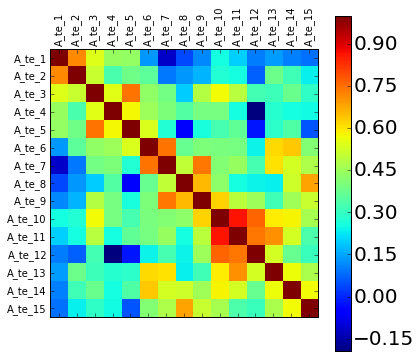

In [130]:
correlation_matrix(df_Attitudes_teacher_HCI)

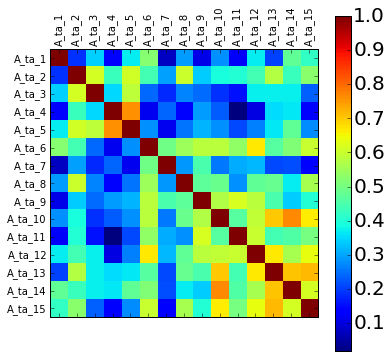

In [131]:
correlation_matrix(df_Attitudes_tablet_HCI)

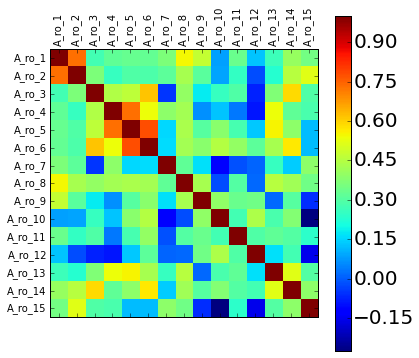

In [132]:
correlation_matrix(df_Attitudes_robot_HCI)

In [133]:
ta=df_Attitudes_tablet_HCI["A_ta_3"].dropna()
ro=df_Attitudes_robot_HCI["A_ro_3"].dropna()
ttest_ind(ta,ro)

(2.0018966339017923, 0.049408736228677523)

##Negative Attitudes Towards Robots (NARS)

In [163]:
df_NARS_factors_HCI = calculate_factors_NARS(df_NARS)
df_NARS_factors_HCI.describe()

,NARS_sub1,NARS_sub2,NARS_sub3
count,52.000000,52.000000,52.000000
mean,2.339744,3.311538,3.128205
std,0.641656,0.612822,0.653977
min,1.000000,2.200000,1.000000
25%,2.000000,3.000000,2.666667
50%,2.333333,3.400000,3.000000
75%,2.833333,3.800000,3.333333
max,3.833333,4.600000,4.666667


Sub-scale 1: Negative Attitudes toward Situations and Interactions with Robots. Items - 4,7,8,9,10,12
Sub-scale 2: Negative Attitudes toward Social Influence of Robots. Items - 1,2,11,13,14
Sub-scale 3: Negative Attitudes toward Emotions in Interaction with Robots. Items - 3r,5r,6r


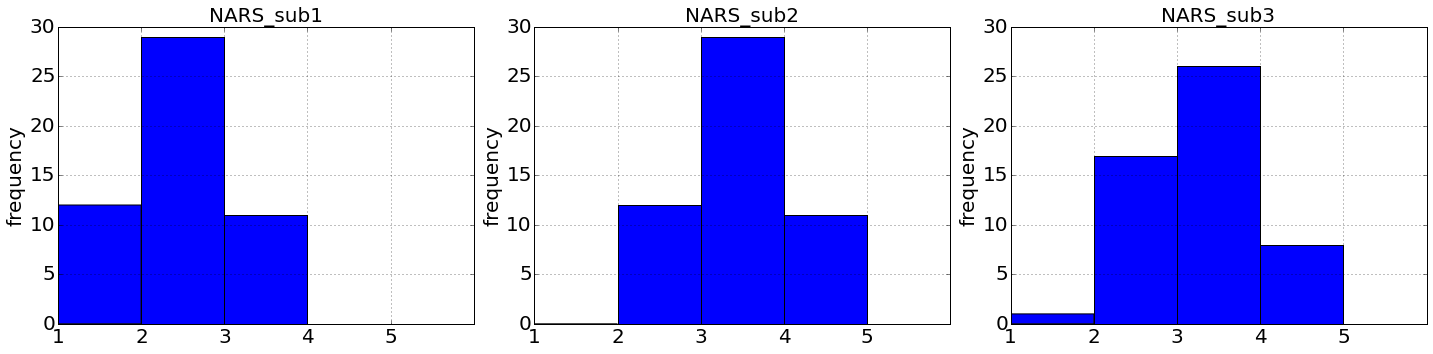

In [135]:
i=1
#for column in df_Attitudes_teacher:
fig = plt.figure(figsize=(20, 5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    nars = df_NARS_factors_HCI["NARS_sub"+str(i+1)].dropna()
    plot_histogram(x=nars)
    
plt.tight_layout() #this will space the graphs nicely from each other
plt.show
print("Sub-scale 1: Negative Attitudes toward Situations and Interactions with Robots. Items - 4,7,8,9,10,12")
print("Sub-scale 2: Negative Attitudes toward Social Influence of Robots. Items - 1,2,11,13,14")
print("Sub-scale 3: Negative Attitudes toward Emotions in Interaction with Robots. Items - 3r,5r,6r")

##Godspeed

<function matplotlib.pyplot.show>

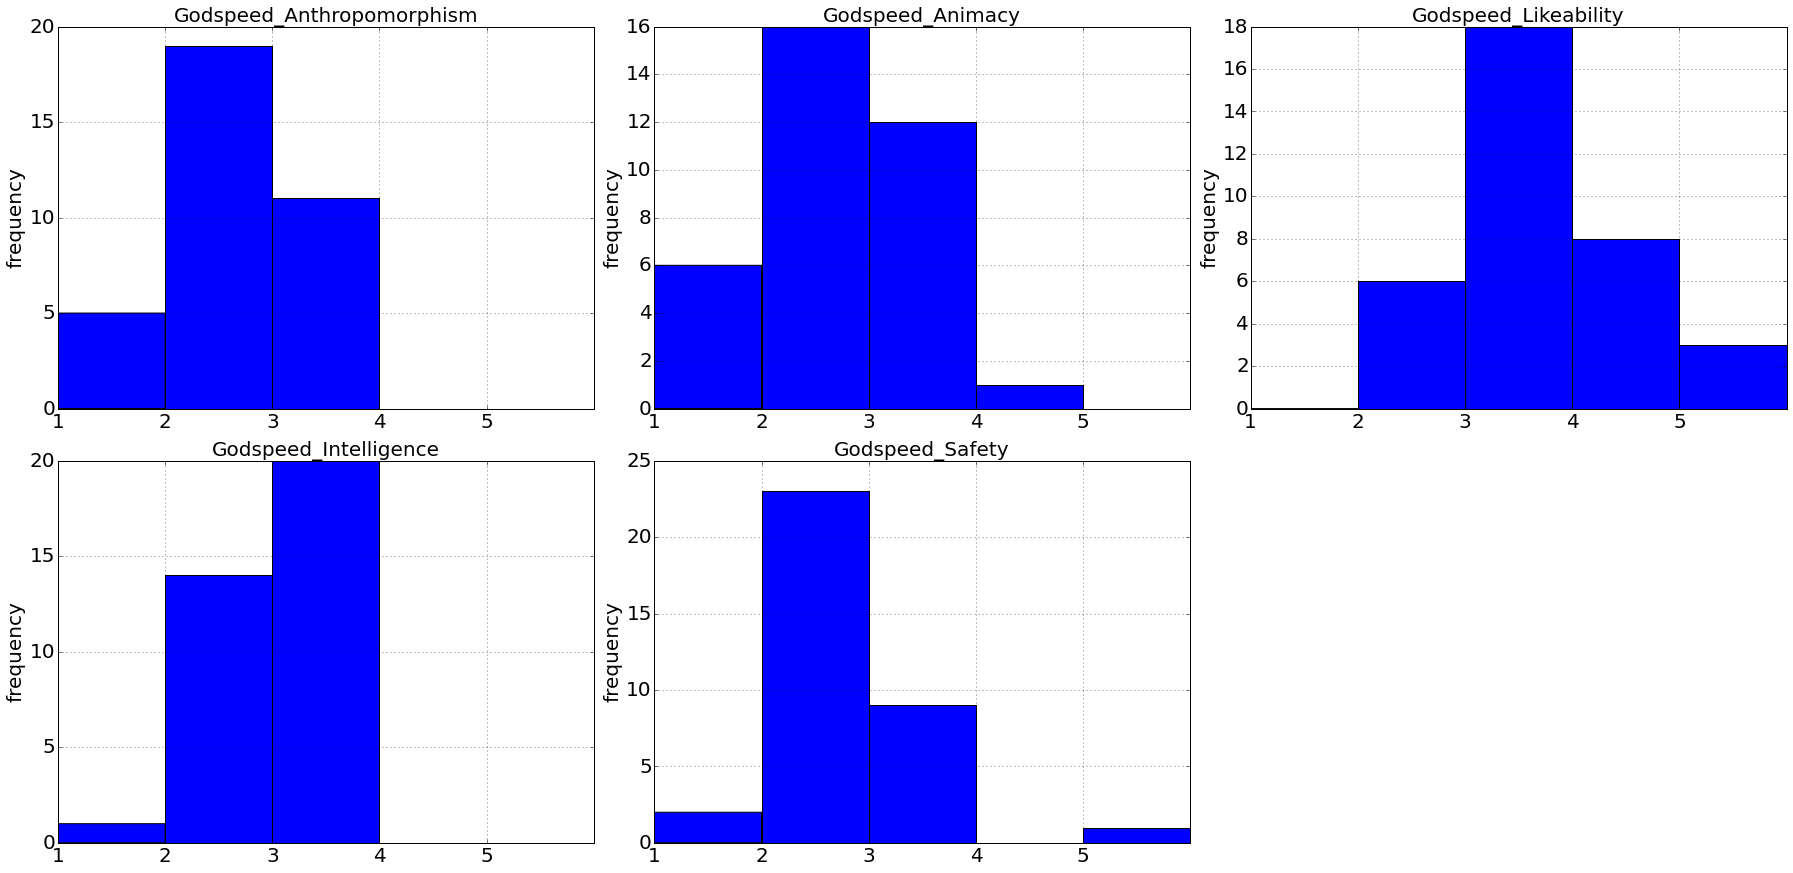

In [137]:
i=1
#for column in df_Attitudes_teacher:
fig = plt.figure(figsize=(25, 30))
grid = plt.GridSpec(2, 3, hspace=10, wspace=10)
i=1
for column in df_Godspeed_factors:
    plt.subplot(5,3,i)
    gdsp = df_Godspeed_factors_HCI[column].dropna()
    plot_histogram(x=gdsp)
    i+=1
    
plt.tight_layout() #this will space the graphs nicely from each other
plt.show

##ATTITUDES TOWARDS TABLET/ROBOT/TEACHER SURVEY

https://medium.com/python-pandemonium/data-visualization-in-python-histogram-in-matplotlib-dce38f49f89c

In [219]:
x=df_Attitudes_tablet_HCI.describe() 
describe_tablet = x.transpose()

x=df_Attitudes_robot_HCI.describe() 
describe_robot = x.transpose()

x=df_Attitudes_teacher_HCI.describe() 
describe_teacher = x.transpose()

df_attitudes_summary = pd.DataFrame()
df_attitudes_summary["Attitude"] = range(1,16)
df_attitudes_summary["question"]=["הבנתי את ההנחיות",
                                  "ההנחיות היו איכותיות",
                                  "חשתי אמון במרצה/עוזר הוראה",
                                  "חשתי תחושת נוחות עם המראה של האפליקציה",
                                  "חשתי תחושת נוחות עם התנהגות המרצה/עוזר הוראה",
                                  "המרצה/עוזר הוראה תרם לפעילות",
                                  "המרצה/עוזר הוראה סיפק עזרה טכנית",
                                  "ארצה שיעורים נוספים כאלו",
                                  "המרצה/עוזר ההוראה הגיב לקבוצה",
                                  "המרצה/עוזר ההוראה היה ידידותי",
                                  "המרצה/עוזר הוראה התנהג באנושיות",
                                  "המרצה/עוזר הוראה היה אנרגטי במהלך השיעור",
                                  "אהבתי את ההנחייה בפעילות",
                                  "הפעילות היתה נעימה",
                                  "הפעילות היתה מעניינת"]

df_attitudes_summary["tablet mean"] = describe_tablet[["mean"]].values
df_attitudes_summary["tablet SD"] = describe_tablet[["std"]].values
df_attitudes_summary["robot mean"] = describe_robot[["mean"]].values
df_attitudes_summary["robot SD"] = describe_robot[["std"]].values
df_attitudes_summary["teacher mean"] = describe_teacher[["mean"]].values
df_attitudes_summary["teacher SD"] = describe_teacher[["std"]].values
df_attitudes_summary["tablet-robot-p-value"] = calculate_t_test(df_Attitudes_tablet_HCI,df_Attitudes_robot_HCI,"A_ta_","A_ro_")
df_attitudes_summary

,Attitude,question,tablet mean,tablet SD,robot mean,robot SD,teacher mean,teacher SD,tablet-robot-p-value
0,1,הבנתי את ההנחיות,4.142857,0.912103,3.617647,1.155086,3.814727,0.945163,0.039548
1,2,ההנחיות היו איכותיות,3.588235,0.939336,3.470588,1.079711,3.544909,0.910460,0.703886
2,3,חשתי אמון במרצה/עוזר הוראה,4.176471,0.869364,3.705882,1.059714,3.890769,0.873049,0.049409
3,4,חשתי תחושת נוחות עם המראה של האפליקציה,3.970588,0.717119,4.088235,0.830029,3.696429,0.853525,0.533872
4,5,חשתי תחושת נוחות עם התנהגות המרצה/עוזר הוראה,4.000000,0.887625,3.794118,0.977920,3.958776,0.939897,0.366662
5,6,המרצה/עוזר הוראה תרם לפעילות,3.685714,0.963188,3.617647,0.888127,3.515577,1.050892,0.761355
6,7,המרצה/עוזר הוראה סיפק עזרה טכנית,4.314286,0.582663,3.970588,0.758199,3.139535,1.315320,0.038150
7,8,ארצה שיעורים נוספים כאלו,3.428571,1.092372,3.323529,1.296162,3.222037,1.106603,0.716703
8,9,המרצה/עוזר ההוראה הגיב לקבוצה,3.114286,1.323352,2.941176,1.179141,3.496346,1.147845,0.568492
9,10,המרצה/עוזר ההוראה היה ידידותי,3.685714,0.866753,3.794118,1.008431,4.070192,0.925522,0.633269


<function matplotlib.pyplot.show>

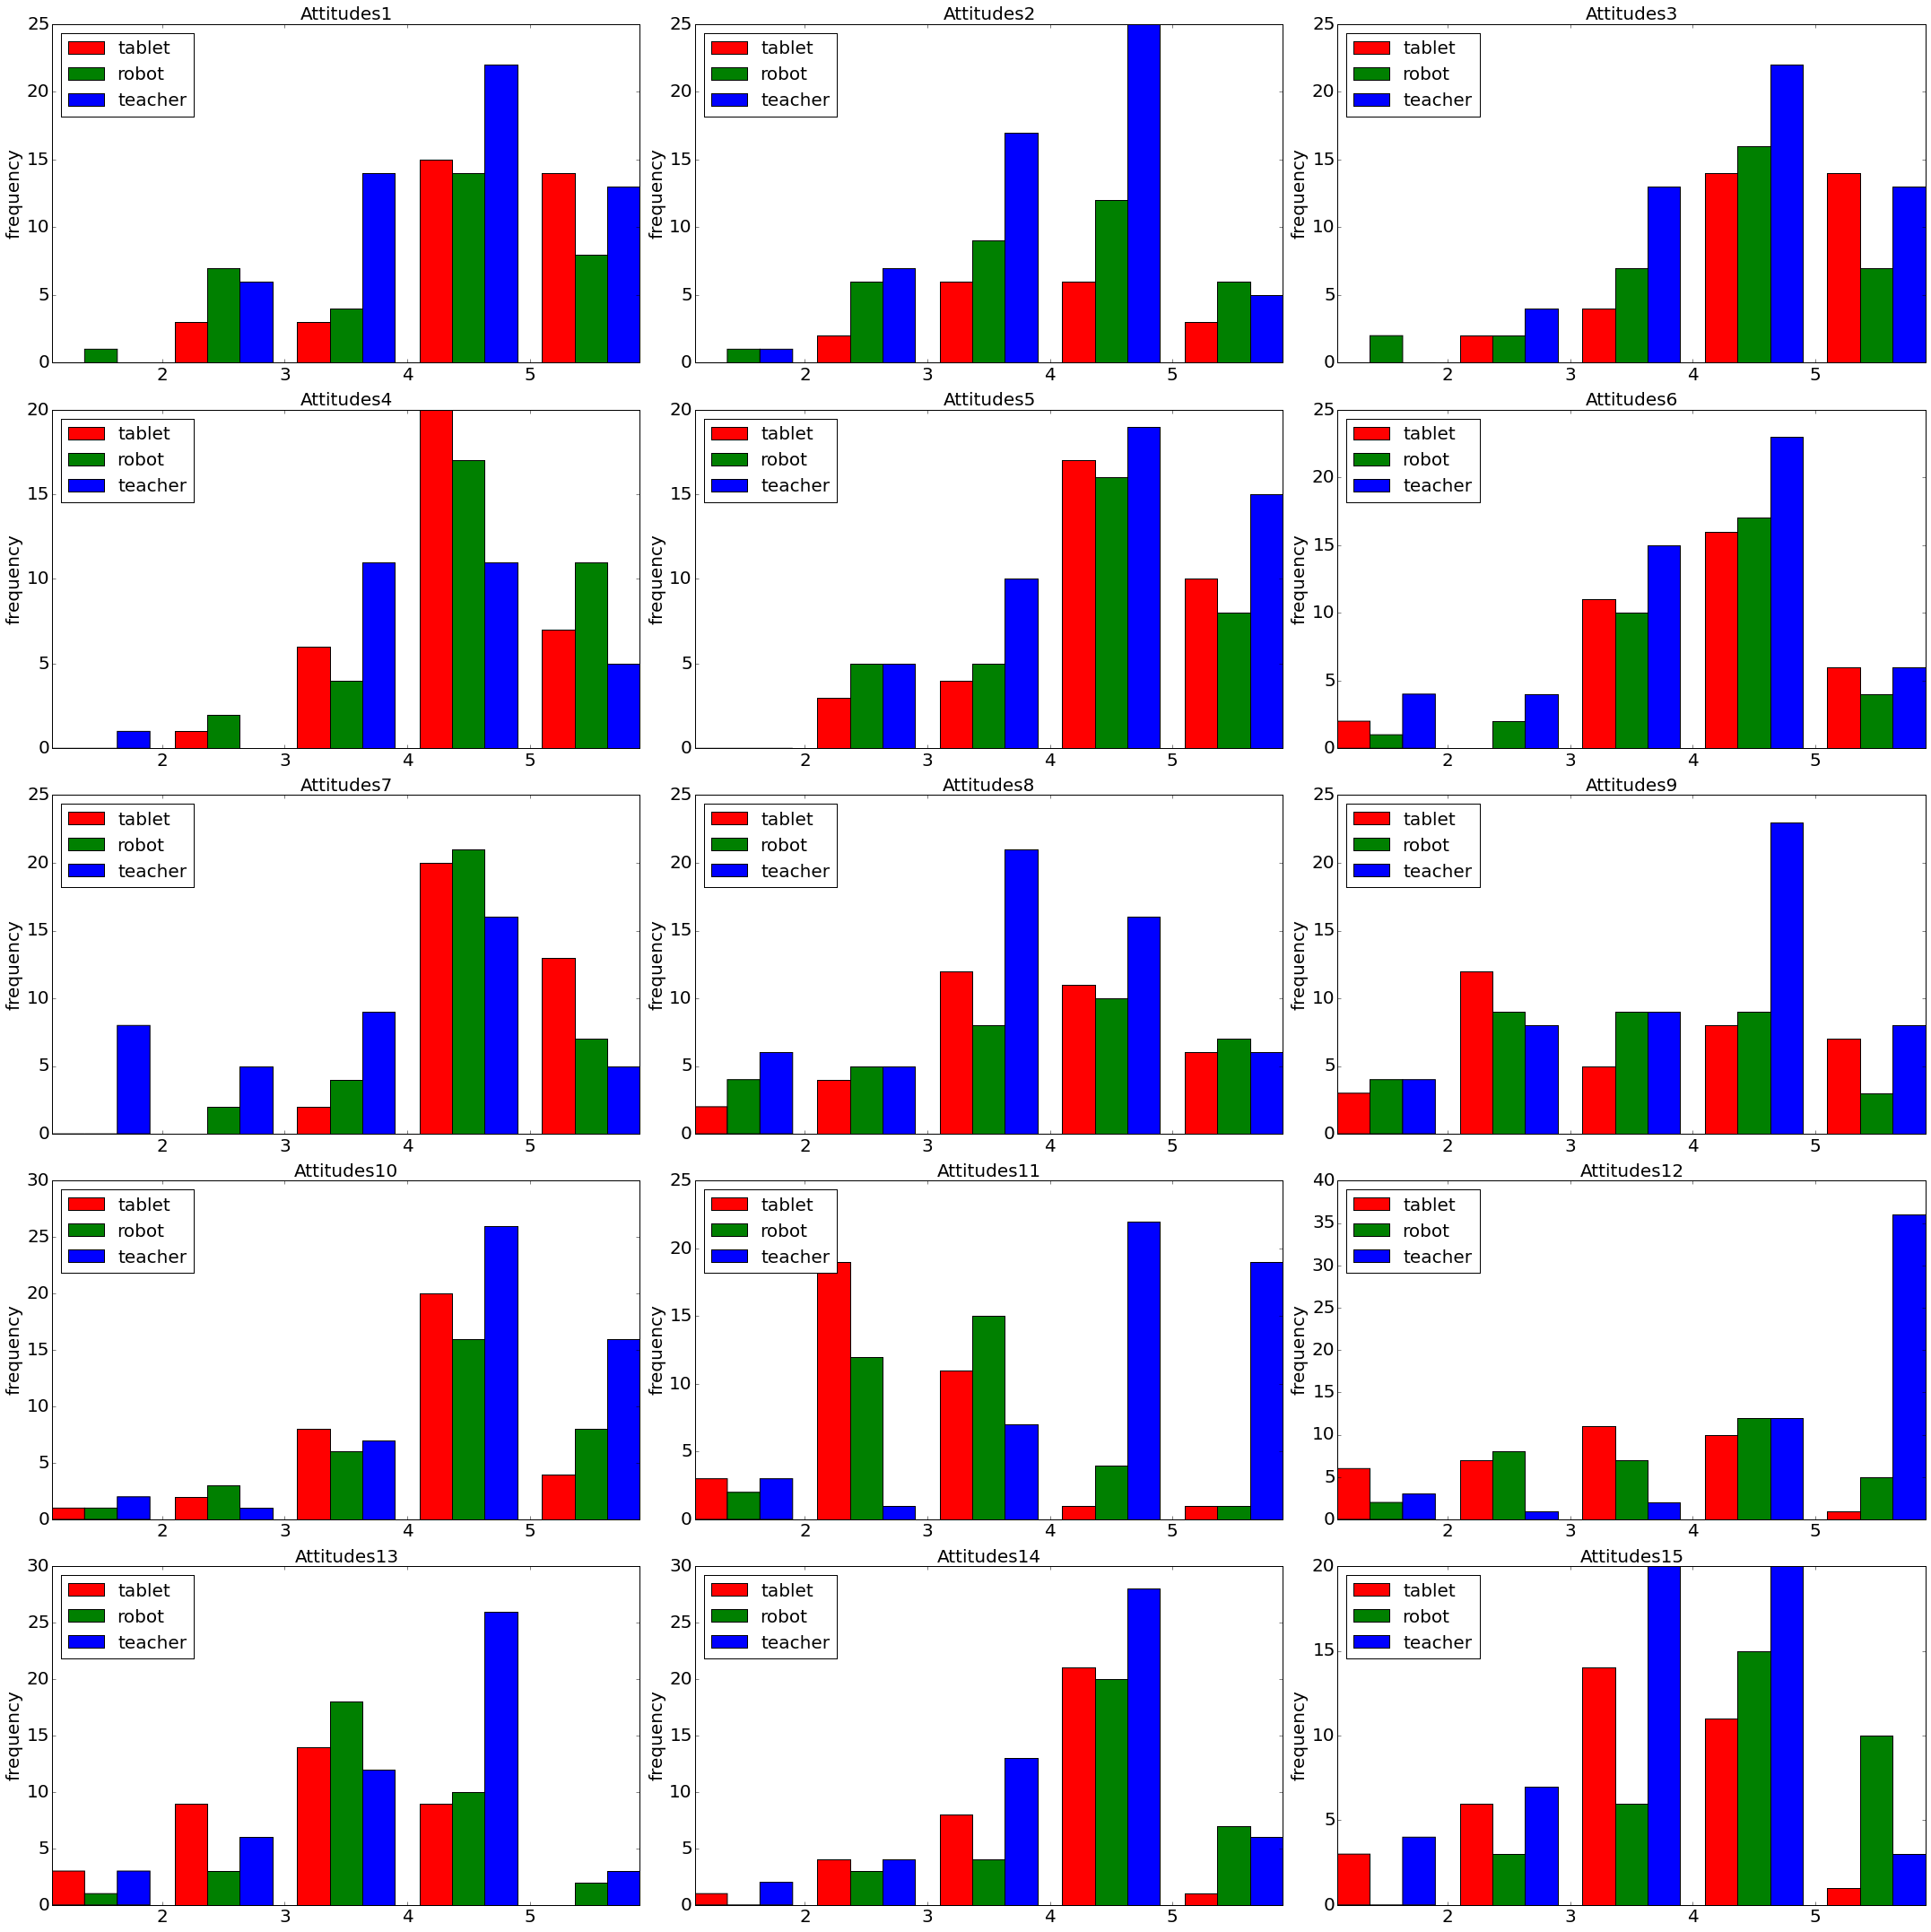

In [118]:
i=1
#for column in df_Attitudes_teacher:
fig = plt.figure(figsize=(30, 30))
grid = plt.GridSpec(3, 5, hspace=10, wspace=10)
for i in range(0,15):
    plt.subplot(5,3,i+1)
    ta = df_Attitudes_tablet["A_ta_"+str(i+1)].dropna()
    ro = df_Attitudes_robot["A_ro_"+str(i+1)].dropna()
    te = df_Attitudes_teacher['A_te_'+str(i+1)].dropna()
    x=[ta,ro,te]
    plot_multi_histogram(x=x,xlabel="Attitudes"+str(i+1))
#plt.legend(["tablet","robot","teacher"],loc=2)    
plt.tight_layout() #this will space the graphs nicely from each other
plt.show

##ATTITUDES TOWARDS GROUP

In [139]:
x=df_Group_tablet_HCI.describe() 
describe_tablet = x.transpose()
x=df_Group_robot_HCI.describe() 
describe_robot = x.transpose()
x=df_Group_teacher_HCI.describe() 
describe_teacher = x.transpose()
df_Group_summary = pd.DataFrame()
df_Group_summary["Group"] = range(1,15)
df_Group_summary["question"]=["העבודה בקבוצה תרמה להבנת החומר",
                                  "הרגשתי שהתבטאתי במהלך הדיונים",
                                  "כל חברי הקבוצה תרמו במידה שווה לדיון",
                                  "ההנחיות לעבודה היו ברורות",
                                  "התרומה של המנחה (אדם/רובוט/טאבלט) הייתה גדולה",
                                  "הרגשתי שחברי הקבוצה התייחסו לדעותיי",
                                  "רצף הפעילויות היה הגיוני וברור",
                                  "חבר קבוצה אחד ניהל את רוב הדיון",
                                  "נהניתי לעבוד עם חברי הקבוצה",
                                  "חברי הקבוצה הרגישו חופשיים להשמיע קולות שונים",
                                  "פעולויות קבוצתיות כמו אלו תורמות ללמידה משמעותית",
                                  "פעולויות קבוצתיות כמו אלו הן ביזבוז זמן",
                                  "פעילויות קבוצתיות כמו אלו עדיפות על פעילויות אישיות",
                                  "פעילויות קבוצתיות תורמות יותר מהרצאה פרונטלית"]
df_Group_summary["tablet mean"] = describe_tablet[["mean"]].values
df_Group_summary["tablet SD"] = describe_tablet[["std"]].values
df_Group_summary["robot mean"] = describe_robot[["mean"]].values
df_Group_summary["robot SD"] = describe_robot[["std"]].values
df_Group_summary["teacher mean"] = describe_teacher[["mean"]].values
df_Group_summary["teacher SD"] = describe_teacher[["std"]].values
df_Group_summary

,Group,question,tablet mean,tablet SD,robot mean,robot SD,teacher mean,teacher SD
0,1,העבודה בקבוצה תרמה להבנת החומר,3.970588,0.758199,3.857143,1.061155,4.090909,0.709346
1,2,הרגשתי שהתבטאתי במהלך הדיונים,3.882353,0.685994,3.857143,0.733359,4.295455,0.593748
2,3,כל חברי הקבוצה תרמו במידה שווה לדיון,3.529412,0.960912,3.742857,1.010034,4.045455,0.913835
3,4,ההנחיות לעבודה היו ברורות,3.529412,1.079711,3.000000,1.212678,3.568182,0.997619
4,5,התרומה של המנחה (אדם/רובוט/טאבלט) הייתה גדולה,3.272727,1.281423,2.942857,1.282068,3.000000,0.945905
5,6,הרגשתי שחברי הקבוצה התייחסו לדעותיי,4.117647,0.477665,4.171429,0.746983,4.409091,0.622007
6,7,רצף הפעילויות היה הגיוני וברור,3.911765,0.933149,3.600000,1.090062,3.953488,0.898504
7,8,חבר קבוצה אחד ניהל את רוב הדיון,2.117647,0.769286,2.142857,0.772424,2.136364,0.878448
8,9,נהניתי לעבוד עם חברי הקבוצה,4.029412,0.834313,4.285714,0.572478,4.477273,0.664328
9,10,חברי הקבוצה הרגישו חופשיים להשמיע קולות שונים,4.323529,0.726994,4.371429,0.731063,4.431818,0.728098


<function matplotlib.pyplot.show>

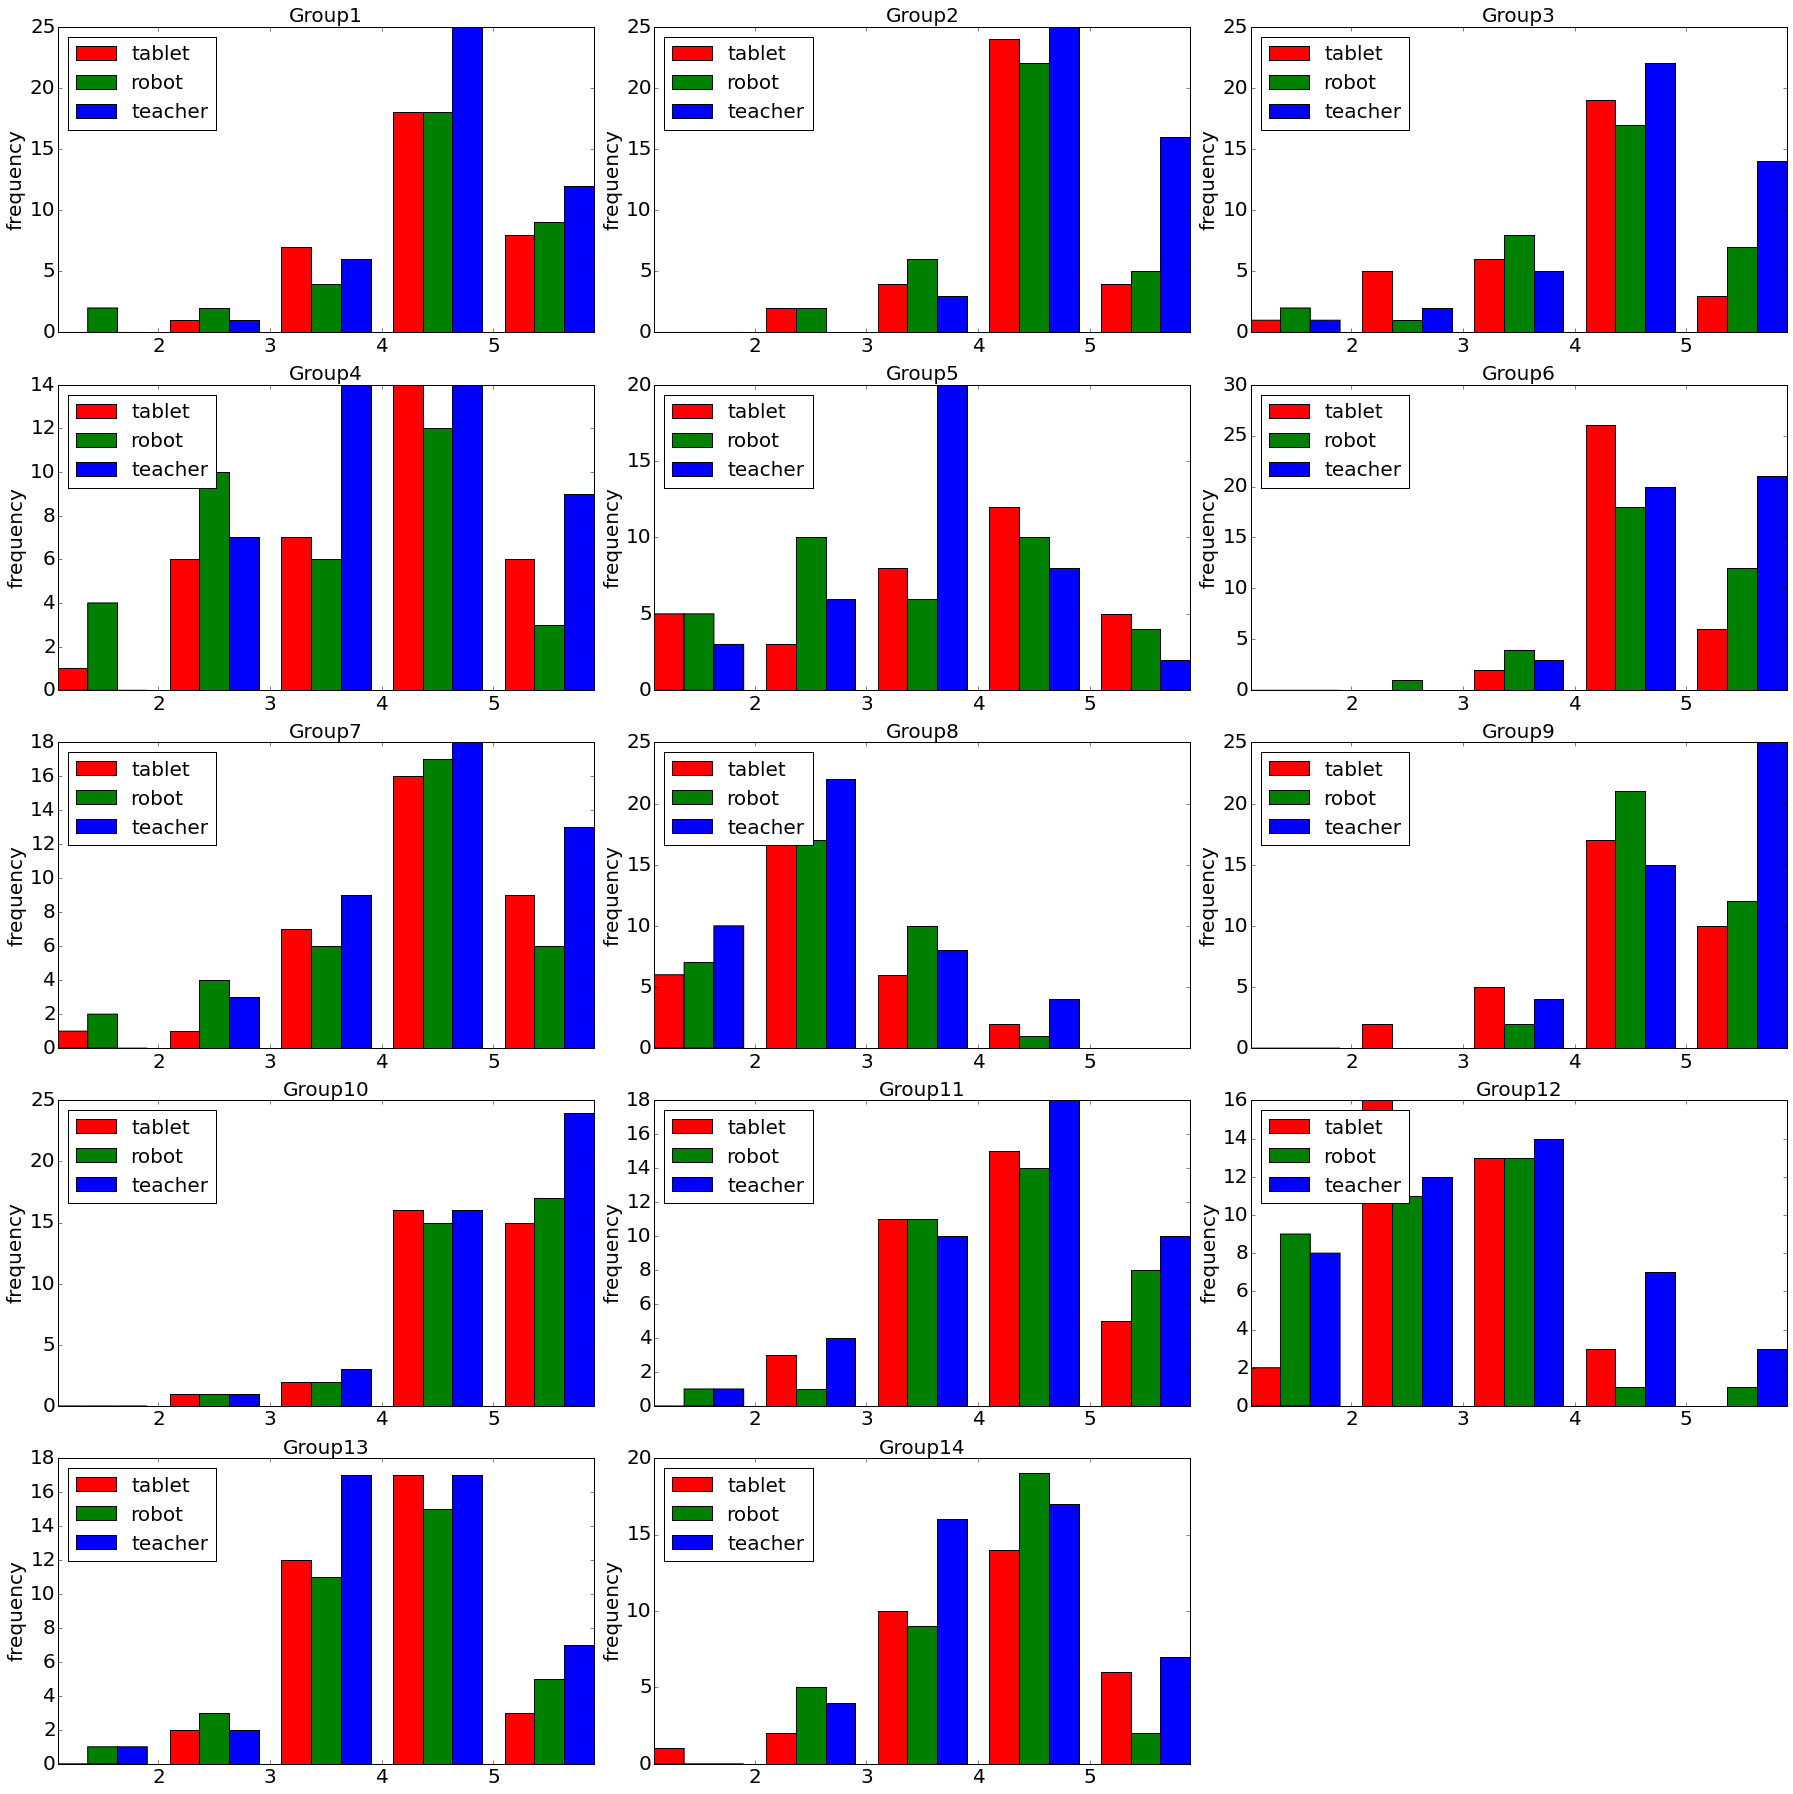

In [119]:
i=1
#for column in df_Attitudes_teacher:
fig = plt.figure(figsize=(25, 25))
grid = plt.GridSpec(3, 5, hspace=10, wspace=10)
for i in range(0,14):
    plt.subplot(5,3,i+1)
    ta = df_Group_tablet["Grp_ta_"+str(i+1)].dropna()
    ro = df_Group_robot["Grp_ro_"+str(i+1)].dropna()
    te = df_Group_teacher['Grp_te_'+str(i+1)].dropna()
    x=[ta,ro,te]
    plot_multi_histogram(x=x,xlabel="Group"+str(i+1))
    
plt.tight_layout() #this will space the graphs nicely from each other
plt.show



#NOT IN USE

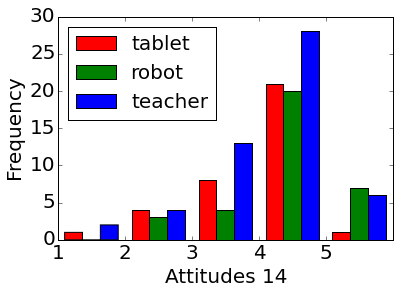

In [140]:
i=13
ta = df_Attitudes_tablet_HCI["A_ta_"+str(i+1)].dropna()
ro = df_Attitudes_robot_HCI["A_ro_"+str(i+1)].dropna()
te = df_Attitudes_teacher_HCI["A_te_"+str(i+1)].dropna()
plt.hist([ta, ro, te],bins=[1,2,3,4,5,6], color=['red', 'green','blue'])
legend = ['tablet', 'robot','teacher']
plt.xlabel("Attitudes "+str(i+1))
plt.ylabel("Frequency")
plt.legend(legend,loc=2)
plt.xticks(range(1, 6))
plt.show()

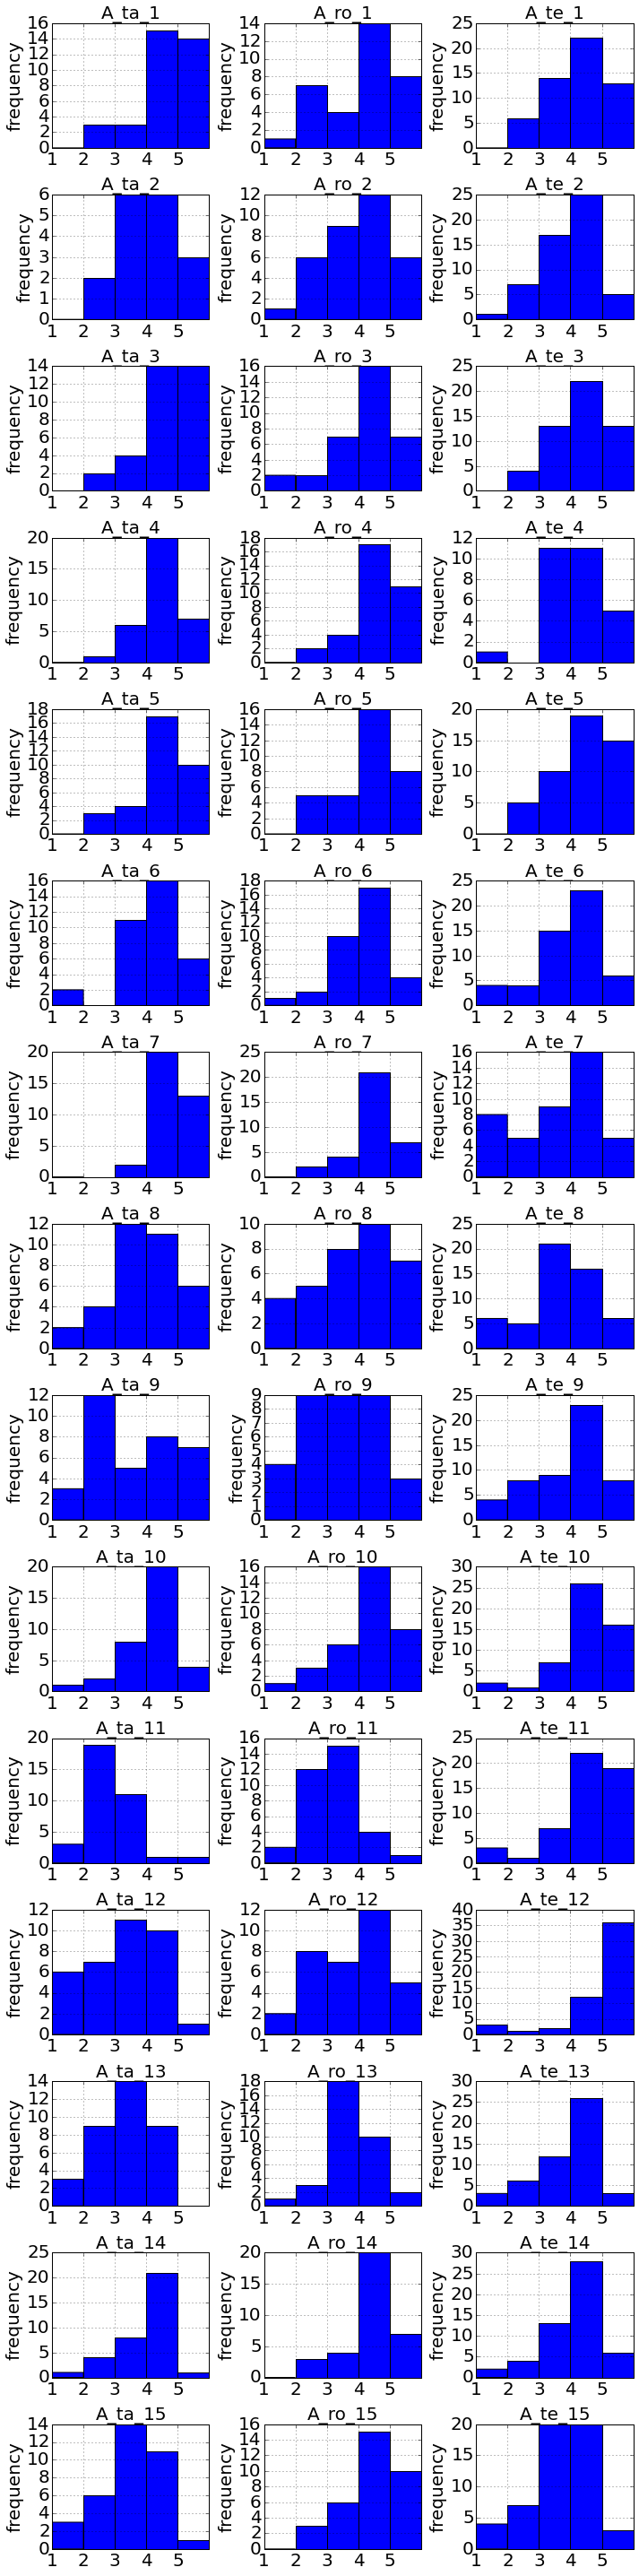

In [141]:
i=1
#for column in df_Attitudes_teacher:
fig = plt.figure(figsize=(10, 40))
grid = plt.GridSpec(14, 14, hspace=50, wspace=10)
for i in range(0,15):
    #print(i)
    plt.subplot(15,3,3*i+1)
    ta = df_Attitudes_tablet_HCI["A_ta_"+str(i+1)]
    #print(te)
    plot_histogram(ta)
    
    plt.subplot(15,3,3*i+2)
    ro = df_Attitudes_robot_HCI["A_ro_"+str(i+1)]
    plot_histogram(ro)
    
    plt.subplot(15,3,3*i+3)
    te = df_Attitudes_teacher_HCI['A_te_'+str(i+1)]
    plot_histogram(te)
    #plt.subplot(3,5,2)
    #x = df_Attitudes_teacher[column]
    #plot_histogram(x)
    i+=1
plt.tight_layout() #this will space the graphs nicely from each other
#plt.show

In [142]:
print(type(df_Attitudes_teacher_HCI))
print(type(df_Attitudes_teacher_HCI['A_te_3']))
x=[5,5,3,3,3,4,2,1,1,1,1]
print(type(x))
x1 = np.asarray(x)
print(type(x1))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<type 'list'>
<type 'numpy.ndarray'>


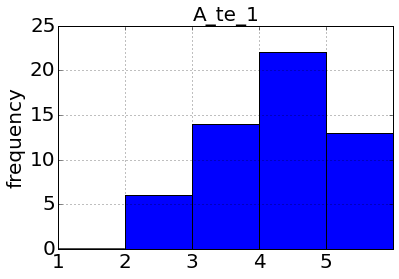

In [143]:
x = df_robotator_HCI['A_te_1']
#x=NARS_factors['NARS_sub3']
#x=NARS_factors['NARS_sub3']
x = x [~np.isnan(x)] #remove all NaN
#print(x)
#print("?????",iterable(x[0]))
plot_histogram(x)

###Example t-test

In [453]:
data = {'Category': ['cat2','cat1','cat2','cat1','cat2','cat1','cat2','cat1','cat1','cat1','cat2'],
        'values': [1,2,3,1,2,3,1,2,3,5,1]}
my_data = pd.DataFrame(data)
my_data.groupby('Category').mean()
cat1 = my_data[my_data['Category']=='cat1']
cat2 = my_data[my_data['Category']=='cat2']
print("cat1",cat1,type(cat1))
print(type(cat1['values']))
ttest_ind(cat1['values'], cat2['values'])

('cat1',   Category  values
1     cat1       2
3     cat1       1
5     cat1       3
7     cat1       2
8     cat1       3
9     cat1       5, <class 'pandas.core.frame.DataFrame'>)
<class 'pandas.core.series.Series'>


(1.4927289925706944, 0.16970867501294376)

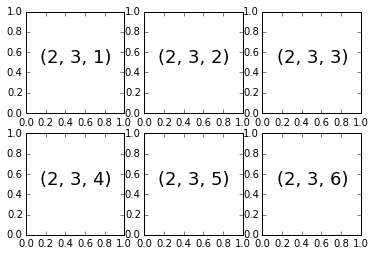

In [205]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

In [144]:
df_Attitudes_robot_HCI.describe()

,A_ro_1,A_ro_2,A_ro_3,A_ro_4,A_ro_5,A_ro_6,A_ro_7,A_ro_8,A_ro_9,A_ro_10,A_ro_11,A_ro_12,A_ro_13,A_ro_14,A_ro_15
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,3.617647,3.470588,3.705882,4.088235,3.794118,3.617647,3.970588,3.323529,2.941176,3.794118,2.705882,3.294118,3.264706,3.911765,3.941176
std,1.155086,1.079711,1.059714,0.830029,0.977920,0.888127,0.758199,1.296162,1.179141,1.008431,0.871412,1.168511,0.827879,0.830029,0.919195
min,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
25%,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,2.250000,2.000000,3.000000,2.000000,2.000000,3.000000,4.000000,3.250000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.500000,3.000000,4.000000,3.000000,3.500000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


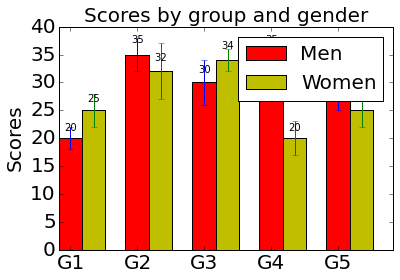

In [145]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

N = 5
men_means = (20, 35, 30, 35, 27)
men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)

women_means = (25, 32, 34, 20, 25)
women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()